In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.constants import c, R_jup, M_jup, G, GM_jup, sigma_sb, M_sun, L_sun
import astropy.units as u
from scipy.interpolate import interp1d, interp2d
import cmocean

from matplotlib import rc
rc('font', family='times new roman', size=22.)

In [ ]:
def heat(temp, R, epsilon=1):
    return (4*np.pi*R**2*sigma_sb*temp**4*epsilon)

In [103]:
age  = {}
logL = {}
L    = {}
M    = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
Teff = {}
for mass in M:
    data = np.genfromtxt("../data/saumon_marley_fig2_" + str(mass) + ".dat", unpack=True)
    age[mass]  = data[0]
    logL[mass] = data[1]
    L[mass]    = np.power(10, data[1])*L_sun
    Teff[mass] = temp(L[mass], R_jup)

(6.0, 10.0)

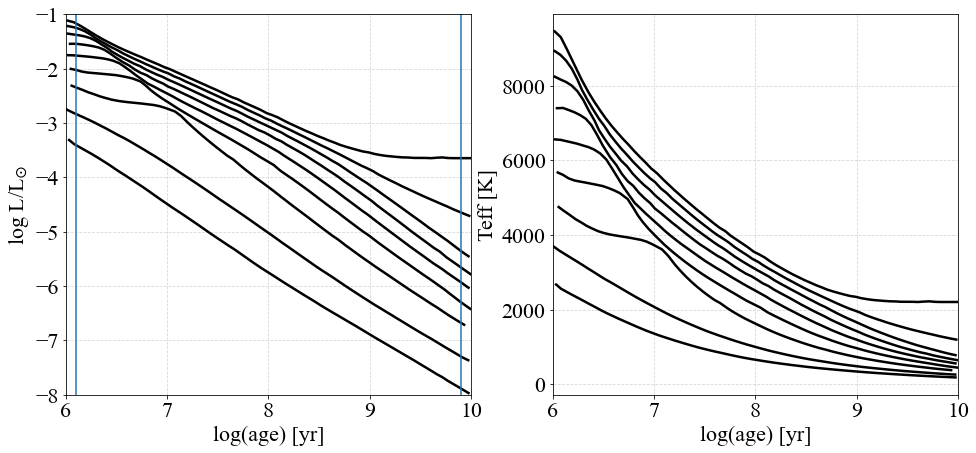

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

for mass in M:
    ax[0].plot(age[mass], logL[mass], color="k", lw=2.5)
    ax[1].plot(age[mass], Teff[mass], color="k", lw=2.5)

ax[0].set_ylabel("log L/L$_{\odot}$")
ax[0].set_xlabel("log(age) [yr]")
ax[0].grid(which="both", ls="--", alpha=0.5)
ax[0].set_ylim([-8, -1])
ax[0].set_xlim([6, 10])
ax[0].axvline(6.1)
ax[0].axvline(9.9)

ax[1].set_ylabel("Teff [K]")
ax[1].set_xlabel("log(age) [yr]")
ax[1].grid(which="both", ls="--", alpha=0.5)
ax[1].set_xlim([6, 10])

In [106]:
log_age  = np.linspace(6.1, 9.9, 10)
_log_age = []
_mass    = []
_teff    = []

for m in M:
    Teff_interp = interp1d(age[m], Teff[m])
    for lage in log_age:
        _log_age.append(lage)
        _mass.append(m)
        _teff.append(Teff_interp(lage))

Teff_interp_2d = interp2d(_log_age, _mass, _teff)
_teff = np.asarray(_teff)

Text(0.5, 0, 'log(age) [yr]')

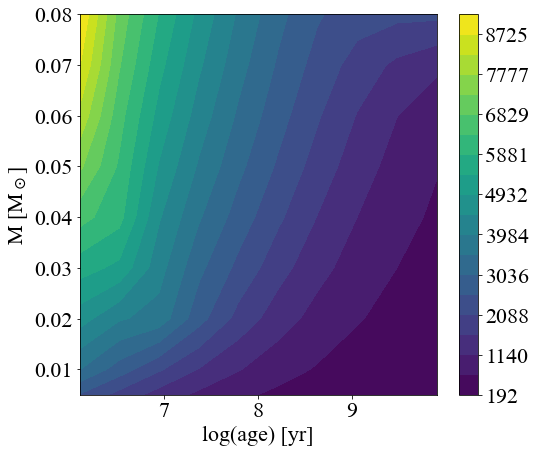

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

Z = _teff.reshape(len(M), len(log_age))

X, Y = np.meshgrid(log_age, M)

levels = np.linspace(np.min(_teff), np.max(_teff), 20)

cs = ax.contourf(X, Y, Z, levels=levels)
cbar = fig.colorbar(cs)

ax.set_ylabel("M [M$_\odot$]")
ax.set_xlabel("log(age) [yr]")